### Loading Code

In [0]:
import numpy as np
import pandas as pd

In [0]:
data = pd.read_csv('lungC.csv')
label = pd.read_csv('expr_all_labels.csv')
genes = pd.read_csv('gene_set.csv')

In [0]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [0]:
train_set, valid_set = train_test_split(train_set, test_size=0.1, random_state=42)

In [0]:
train_set.shape

(811, 20506)

In [0]:
valid_set.shape

(91, 20506)

In [0]:
test_set.shape

(226, 20506)

In [0]:
train_set.head()

,Unnamed: 0,sample_IDs,labels,fromTissu,sample_orig_IDs,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
1102,6629,TCGA-NC-A5HF-01,17,LUSC,TCGA-NC-A5HF-01A-11R-A26W-07,184.1355,0.0000,36.3727,22.5710,209.2676,3030.3189,1061.2855,1.4948,1.4948,1242.1525,43.8465,1897.8575,0.0000,0.0000,0.4983,35.3762,43.3483,712.0080,961.6343,3851.0214,0.4983,686.0688,281.5147,4898.3558,710.9517,156.9507,965.1221,870.4534,103.6373,109.1181,30.8919,70.3338,410.0648,714.9975,28.4006,...,1237.1699,1685.3463,81.7140,272.0478,0.4983,8.7394,148.9786,49.3224,776.7813,0.0000,114.1006,305.5556,156.9507,1.4948,392.6258,111.1111,7.4738,118.5850,1.9930,363.2287,0.000,105.1320,593.4230,159.4420,314.3996,140.7723,191.3303,564.0259,339.1530,1059.7907,33.3832,228.6996,1344.2950,28.8989,468.3607,6109.6163,825.1121,739.9103,194.3199,0.9965
530,6057,TCGA-J2-8192-01,16,LUAD,TCGA-J2-8192-01A-11R-2241-07,60.5462,0.0000,2.2525,80.9723,43.1722,26093.9165,751.1966,2.2525,1.8771,501.5486,0.7508,536.8372,0.0000,0.0000,0.0000,15.0164,79.5870,775.5983,1077.4284,1901.0793,0.3754,354.3576,407.3205,3417.3627,1006.4758,410.6992,792.8672,1009.1037,46.9263,600.2816,7.8836,91.2135,447.4894,269.5448,29.6574,...,754.5753,1224.9348,58.5641,266.1661,2.6279,27.5251,177.1938,104.6945,879.5870,0.3754,63.0690,172.5650,102.1117,37.9165,342.3745,199.3430,15.3918,21.3984,0.7508,212.8578,0.000,116.3773,672.7358,445.2370,629.9390,245.9728,126.1380,434.3501,272.8297,233.8808,91.2248,607.4144,986.5791,18.3951,1474.2374,4024.4017,1164.8991,815.3918,72.4542,0.0000
516,6043,TCGA-97-A4LX-01,16,LUAD,TCGA-97-A4LX-01A-11R-A24X-07,156.0802,0.0000,0.0000,90.4808,0.8798,27417.3606,247.2297,1.7596,0.0000,690.6594,6.1587,850.3469,0.0000,0.0000,0.4399,37.8323,43.5511,607.9562,1107.6945,1614.4713,3.0794,560.7670,337.4113,2918.8057,832.7505,428.0329,579.3620,1292.8968,100.7395,434.6315,19.3561,87.8237,141.6512,25.5148,121.8552,...,580.2419,1608.5105,45.3108,222.1548,0.0000,18.6566,128.8938,108.2180,941.8482,0.4399,72.1453,123.9360,92.8211,25.0749,323.7741,160.1274,3.5193,47.0704,0.4399,292.5404,0.000,106.0184,511.1759,201.0391,530.0921,155.3324,128.4538,362.9261,219.9156,377.0032,60.7076,366.0055,1307.8537,77.8641,1039.9483,6665.5229,1454.7838,752.6868,11.8776,0.0000
667,6194,TCGA-33-4587-11,33,LUSC,TCGA-33-4587-11A-01R-2125-07,287.3225,0.0000,0.9281,94.1624,0.0000,68827.7865,638.9791,12.5290,0.0000,542.4594,13.4571,538.2831,3.2483,0.0000,0.0000,526.2181,140.6032,1036.1949,509.0487,2035.2668,0.4640,280.6775,381.9026,2020.4176,762.4130,371.6937,302.0882,656.1485,420.5290,211.1369,84.9745,150.2413,0.0000,37.5870,3.7123,...,761.9490,1477.7355,24.5940,316.4733,1.3921,14.5429,253.3643,133.6102,929.0023,3.2483,39.4432,176.8260,74.2459,28.3063,292.8074,145.2436,6.0325,75.1740,1.8561,229.2343,0.000,216.2413,192.1114,127.1462,342.4594,669.8840,246.8677,290.4872,156.3155,148.0278,40.8353,265.4292,777.7262,3.2483,926.6821,4579.5824,878.8863,634.8028,103.4803,0.0000
606,6133,TCGA-21-5782-01,17,LUSC,TCGA-21-5782-01A-01R-1635-07,155.0562,1.1236,13.4831,198.5281,1050.5618,9403.2921,1151.6854,8.9888,6.7416,1142.6966,13.4831,1384.2697,12.3596,30.3371,8.9888,311.2360,39.3258,1355.0562,1052.8090,3691.0112,3.3708,988.5169,613.4831,7869.6629,719.1011,321.3483,278.6517,2089.8876,48.3146,86.5169,13.4831,117.4045,942.6966,998.8764,19.1011,...,1270.7865,617.8315,17.9775,223.5955,4.4944,53.9551,233.7079,83.0899,280.8989,5.6180,106.7416,371.5506,226.9663,15.7303,511.2360,193.2584,12.3596,135.9551,16.8539,342.6966,11.236,119.1011,569.6629,88.7640,420.2247,111.3371,175.2809,607.8652,475.9888,1812.359

In [0]:
train_set.describe()

,Unnamed: 0,labels,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.00000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,6098.958076,18.033292,134.964550,2.663757,9.117174,95.005209,822.114885,24603.250611,860.064634,7.334247,0.582615,763.942054,9.003812,957.391960,12.533774,0.309119,0.198975,189.743078,108.998993,1176.503993,1064.554385,2524.438618,0.840298,505.700613,508.915304,3723.984945,920.297125,271.416018,600.030714,1385.616798,236.297889,329.163488,23.341172,92.537132,364.677946,699.867406,16.829440,1391.170343,1031.498371,5409.997858,...,819.870834,1318.505454,60.375741,214.400506,1.628403,34.474679,185.663338,118.421261,764.438202,3.129061,58.509983,200.754900,113.713212,29.198420,460.803400,192.718857,6.833038,86.536474,2.227793,279.138297,0.120455,118.334027,518.298219,174.531523,474.660201,247.592488,170.879199,485.674523,469.896601,782.514336,49.042344,366.45302,1241.244570,54.559051,791.246080,4581.061747,1091.521602,732.582596,118.311309,0.550687
std,325.432993,4.804332,189.622174,20.691684,48.798840,47.786609,2386.112347,30936.974642,968.196627,112.188496,2.206112,261.595413,63.519631,555.075965,62.823948,2.440743,1.412976,589.760856,96.685236,457.325199,477.510542,753.549100,1.338873,237.932044,199.383207,1718.813831,375.408304,129.928457,673.702594,514.909268,347.004410,400.037348,47.409112,61.386256,616.547403,1096.876928,45.913952,882.876727,645.377751,7920.643391,...,238.222028,508.710554,38.393021,97.434168,9.604727,31.985032,93.534306,76.151947,496.339572,7.271020,26.646403,100.460146,44.201716,28.129528,160.779676,95.925883,18.970794,58.978710,5.252376,98.254712,0.858981,51.178244,286.446832,148.753602,207.917127,127.886861,61.162735,216.210387,275.814551,570.287155,21.150934,149.01445,458.125781,74.464935,257.559635,2277.255395,459.759279,305.363410,255.225415,2.592502
min,5527.000000,16.000000,2.396600,0.000000,0.000000,11.670600,0.000000,576.822200,26.890300,0.000000,0.000000,151.590800,0.000000,173.516000,0.000000,0.000000,0.000000,0.000000,1.801000,452.597200,122.321000,866.733500,0.000000,56.592400,113.542500,946.475400,271.734200,55.607900,18.663500,259.170400,1.002000,12.009600,0.000000,2.445700,0.000000,0.000000,0.000000,120.156200,16.255300,8.788200,...,206.482000,441.890500,3.123000,42.211100,0.000000,0.805300,27.277900,9.634100,15.051200,0.000000,10.836800,38.524200,35.434100,0.000000,98.735700,19.014100,0.000000,13.116800,0.000000,57.194500,0.000000,18.491500,57.380800,0.000000,89.041100,65.251400,50.028100,117.591200,96.045200,32.986100,4.214300,34.09940,314.870600,0.000000,188.550800,446.043200,162.310000,219.603600,0.400300,0.000000
25%,5811.500000,16.000000,48.785250,0.000000,0.000000,61.391750,0.746850,

In [0]:
data.shape

(1128, 20506)

In [0]:
data.head()

,Unnamed: 0,sample_IDs,labels,fromTissu,sample_orig_IDs,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,5527,TCGA-05-4244-01,16,LUAD,TCGA-05-4244-01A-01R-1107-07,26.0302,0.000,1.7454,135.5022,0.3491,9844.7858,130.9015,1.0472,0.0000,651.0167,0.6981,803.5605,0.6981,0.0,0.000,3.4907,53.0587,988.2189,1038.1360,1915.3504,0.0000,516.9282,472.2925,3054.7168,465.6602,370.3639,270.5297,1837.1586,66.3234,431.8003,8.7268,41.9094,484.1609,311.3710,9.7740,...,523.6059,1640.3735,24.7840,148.3550,0.3491,22.7629,73.6539,193.7342,125.6654,1.7454,83.7769,176.5355,145.5624,4.8870,400.0349,154.9873,1.7454,29.3219,0.3491,192.3379,0.3491,130.2033,850.3360,162.6669,842.6564,220.2635,152.1948,179.7714,221.1642,517.6717,39.7940,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0
1,5528,TCGA-05-4249-01,16,LUAD,TCGA-05-4249-01A-01R-1107-07,120.1349,0.322,1.6098,89.0629,1.6098,25712.6617,578.5562,0.6439,0.3220,604.3128,0.0000,999.9976,0.0000,0.0,0.322,266.9021,185.4471,904.3764,839.6631,2238.8871,0.3220,319.3135,500.6427,2826.7800,966.5141,226.3356,372.8259,1493.5572,168.4284,478.7496,6.7611,122.3081,140.3731,357.6939,3.8635,...,1000.9635,1288.2680,67.2890,166.7736,0.0000,21.5808,221.1843,124.5715,679.6506,0.9659,74.3720,105.2477,129.4266,7.0830,430.4561,472.6325,4.8294,134.8999,5.7952,259.1752,0.0000,231.1649,564.0682,456.8566,481.3253,186.9860,201.8669,478.7496,198.5893,287.5074,62.1376,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0
2,5529,TCGA-05-4250-01,16,LUAD,TCGA-05-4250-01A-01R-1107-07,50.8597,0.000,0.0000,151.1332,0.0000,16943.6359,356.4619,0.9948,1.3264,588.5766,0.6632,754.0413,0.0000,0.0,0.000,26.1958,81.9033,1148.3047,571.6654,2808.9198,0.6632,411.8246,625.7150,3553.6765,897.9524,233.1095,198.9555,2418.9671,37.8015,91.8511,2.3211,146.8988,778.2475,22.2167,0.6632,...,522.9213,1201.2368,73.9451,155.8485,0.0000,48.8336,201.6082,100.1277,110.4203,0.0000,42.7754,172.0633,76.5979,33.1592,300.4228,158.5012,0.0000,23.5431,0.3316,260.3001,0.3316,183.7022,419.4645,113.7362,362.0990,143.5033,137.9425,485.1198,520.8986,1046.8374,60.0182,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0
3,5530,TCGA-05-4382-01,16,LUAD,TCGA-05-4382-01A-01R-1206-07,145.9037,0.000,0.0000,112.0685,4.7861,23326.2727,554.4677,2.1537,1.4358,608.3112,2.6323,1079.9796,0.0000,0.0,0.000,3.5896,46.6643,1005.5560,834.6929,2470.0975,0.7179,409.1790,456.3530,4093.0582,748.3041,218.9633,221.8349,1504.7445,53.6041,242.1758,4.5468,35.7664,180.6746,424.0470,94.5251,...,674.8377,1092.5335,37.3314,189.7682,5.7433,25.6079,199.1011,217.2882,664.5476,16.2727,85.6709,202.9730,92.6107,3.8289,326.8895,393.4160,1.4358,53.1255,2.6323,255.3375,0.0000,148.8472,862.6915,355.1274,408.7315,221.4616,153.1547,486.2660,429.6299,753.0902,40.4424,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0
4,5531,TCGA-05-4384-01,16,LUAD,TCGA-05-4384-01A-01R-1755-07,127.3671,0.000,0.0000,87.5748,0.0000,48314.5571,152.7184,1.8326,0.0000,665.8522,3.6652,709.8351,0.0000,0.0,0.000,34.8198,100.7941,1103.8485,1042.7611,2535.1252,0.0000,401.9548,403.7874,1674.4044,960.8308,246.7929,999.3891,990.8369,595.7605,714.7221,10.9957,106.8357,185.0947,140.5009,7.9414,...,833.2315,1548.9004,65.3635,169.8228,0.0000,15.1374,164.3250,157.5870,346.3653,0.6109,72.6940,157.7886,125.8400,24.4349,656.0782,311.5455,0.0000,43.9829,0.0000,274.2822,0.0000,83.6897,259.0104,436.7746,607.2083,334.9969,169.8228,351.2523,258.3018,153.9401,80.0244,563.2254,1320.7086,7.9414,778.8638,3341.4783,1737.3244,723.2743,378

In [0]:
data = data.drop(labels={'sample_IDs', 'fromTissu', 'sample_orig_IDs'}, axis=1)

In [0]:
train_set1 = train_set.drop(labels={'sample_IDs', 'fromTissu', 'sample_orig_IDs'}, axis=1)

In [0]:
train_set2 = train_set1.drop(labels={'Unnamed: 0', 'labels'}, axis=1)

In [0]:
gene_set = data.drop(labels={'sample_IDs', 'fromTissu', 'sample_orig_IDs','Unnamed: 0', 'labels'}, axis=1)

In [0]:
train_set1 = train_set1.astype('float')

In [0]:
train_set1.head()

,Unnamed: 0,labels,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
1102,6629.0,17.0,184.1355,0.0000,36.3727,22.5710,209.2676,3030.3189,1061.2855,1.4948,1.4948,1242.1525,43.8465,1897.8575,0.0000,0.0000,0.4983,35.3762,43.3483,712.0080,961.6343,3851.0214,0.4983,686.0688,281.5147,4898.3558,710.9517,156.9507,965.1221,870.4534,103.6373,109.1181,30.8919,70.3338,410.0648,714.9975,28.4006,1086.1983,1606.8759,1569.5067,...,1237.1699,1685.3463,81.7140,272.0478,0.4983,8.7394,148.9786,49.3224,776.7813,0.0000,114.1006,305.5556,156.9507,1.4948,392.6258,111.1111,7.4738,118.5850,1.9930,363.2287,0.000,105.1320,593.4230,159.4420,314.3996,140.7723,191.3303,564.0259,339.1530,1059.7907,33.3832,228.6996,1344.2950,28.8989,468.3607,6109.6163,825.1121,739.9103,194.3199,0.9965
530,6057.0,16.0,60.5462,0.0000,2.2525,80.9723,43.1722,26093.9165,751.1966,2.2525,1.8771,501.5486,0.7508,536.8372,0.0000,0.0000,0.0000,15.0164,79.5870,775.5983,1077.4284,1901.0793,0.3754,354.3576,407.3205,3417.3627,1006.4758,410.6992,792.8672,1009.1037,46.9263,600.2816,7.8836,91.2135,447.4894,269.5448,29.6574,957.2332,853.3083,2155.9831,...,754.5753,1224.9348,58.5641,266.1661,2.6279,27.5251,177.1938,104.6945,879.5870,0.3754,63.0690,172.5650,102.1117,37.9165,342.3745,199.3430,15.3918,21.3984,0.7508,212.8578,0.000,116.3773,672.7358,445.2370,629.9390,245.9728,126.1380,434.3501,272.8297,233.8808,91.2248,607.4144,986.5791,18.3951,1474.2374,4024.4017,1164.8991,815.3918,72.4542,0.0000
516,6043.0,16.0,156.0802,0.0000,0.0000,90.4808,0.8798,27417.3606,247.2297,1.7596,0.0000,690.6594,6.1587,850.3469,0.0000,0.0000,0.4399,37.8323,43.5511,607.9562,1107.6945,1614.4713,3.0794,560.7670,337.4113,2918.8057,832.7505,428.0329,579.3620,1292.8968,100.7395,434.6315,19.3561,87.8237,141.6512,25.5148,121.8552,1525.1563,1679.5780,5180.8252,...,580.2419,1608.5105,45.3108,222.1548,0.0000,18.6566,128.8938,108.2180,941.8482,0.4399,72.1453,123.9360,92.8211,25.0749,323.7741,160.1274,3.5193,47.0704,0.4399,292.5404,0.000,106.0184,511.1759,201.0391,530.0921,155.3324,128.4538,362.9261,219.9156,377.0032,60.7076,366.0055,1307.8537,77.8641,1039.9483,6665.5229,1454.7838,752.6868,11.8776,0.0000
667,6194.0,33.0,287.3225,0.0000,0.9281,94.1624,0.0000,68827.7865,638.9791,12.5290,0.0000,542.4594,13.4571,538.2831,3.2483,0.0000,0.0000,526.2181,140.6032,1036.1949,509.0487,2035.2668,0.4640,280.6775,381.9026,2020.4176,762.4130,371.6937,302.0882,656.1485,420.5290,211.1369,84.9745,150.2413,0.0000,37.5870,3.7123,918.7935,485.3828,12814.3852,...,761.9490,1477.7355,24.5940,316.4733,1.3921,14.5429,253.3643,133.6102,929.0023,3.2483,39.4432,176.8260,74.2459,28.3063,292.8074,145.2436,6.0325,75.1740,1.8561,229.2343,0.000,216.2413,192.1114,127.1462,342.4594,669.8840,246.8677,290.4872,156.3155,148.0278,40.8353,265.4292,777.7262,3.2483,926.6821,4579.5824,878.8863,634.8028,103.4803,0.0000
606,6133.0,17.0,155.0562,1.1236,13.4831,198.5281,1050.5618,9403.2921,1151.6854,8.9888,6.7416,1142.6966,13.4831,1384.2697,12.3596,30.3371,8.9888,311.2360,39.3258,1355.0562,1052.8090,3691.0112,3.3708,988.5169,613.4831,7869.6629,719.1011,321.3483,278.6517,2089.8876,48.3146,86.5169,13.4831,117.4045,942.6966,998.8764,19.1011,1119.1011,861.7978,574.1573,...,1270.7865,617.8315,17.9775,223.5955,4.4944,53.9551,233.7079,83.0899,280.8989,5.6180,106.7416,371.5506,226.9663,15.7303,511.2360,193.2584,12.3596,135.9551,16.8539,342.6966,11.236,119.1011,569.6629,88.7640,420.2247,111.3371,175.2809,607.8652,475.9888,1812.3596,42.6966,242.6966,1538.2022,37.0787,503.3708,5314.6067,776.4045,589.8876,19.1011,0.0000


### MAGIC

In [0]:
!pip install magic-impute

MAGIC, Markov Affinity-based Graph Imputation of Cells, denoises single-cell gene expression data
and generates denoised output per gene and entry

In [0]:
import magic
import pandas as pd
import matplotlib.pyplot as plt

Calculating MAGIC...
  Running MAGIC on 811 cells and 20503 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/usr/local/lib/python3.6/dist-packages/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


    Calculated PCA in 2.53 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.13 seconds.
    Calculating affinities...
    Calculated affinities in 0.12 seconds.
  Calculated graph and diffusion operator in 2.84 seconds.
  Calculating imputation...
Calculated MAGIC in 3.25 seconds.


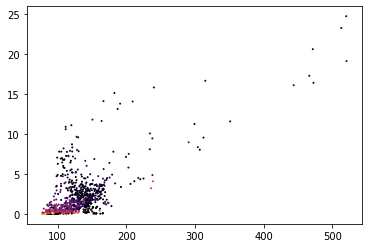

In [0]:
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(train_set1, genes=['A1BG', 'A1CF', 'A2ML1'])
plt.scatter(X_magic['A1BG'], X_magic['A1CF'], c=X_magic['A2ML1'], s=1, cmap='inferno')
plt.show()
magic.plot.animate_magic(train_set1, gene_x='A1BG', gene_y='A1CF', gene_color='A2ML1', operator=magic_operator)

In [0]:
train_set1.columns

Index(['Unnamed: 0', 'labels', 'A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1',
       'A2M', 'A4GALT', 'A4GNT',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'psiTPTE22', 'tAKR'],
      dtype='object', length=20503)

In [0]:
train_set2.columns

Index(['A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M', 'A4GALT', 'A4GNT',
       'AAA1', 'AAAS',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'psiTPTE22', 'tAKR'],
      dtype='object', length=20501)

In [0]:
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(genes, genes=genes.columns)

Calculating MAGIC...
  Running MAGIC on 1128 cells and 20502 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/usr/local/lib/python3.6/dist-packages/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


    Calculated PCA in 4.61 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.23 seconds.
    Calculating affinities...
    Calculated affinities in 0.20 seconds.
  Calculated graph and diffusion operator in 5.15 seconds.
  Running MAGIC with `solver='exact'` on 20502-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 1.78 seconds.
Calculated MAGIC in 24.18 seconds.


In [0]:
X_magic = X_magic.drop('Unnamed: 0', axis=1)
X_magic.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,125.451683,6.906817,14.048202,103.201459,22.310204,26445.210531,315.643942,4.205648,0.651220,658.906827,25.454430,879.688765,1.072612,0.036771,0.176936,128.439694,130.576270,998.747556,908.687025,2392.628783,0.851471,479.876402,506.087408,3231.465984,901.045498,277.853875,729.922049,1409.224375,332.437397,464.911675,16.515940,106.319486,279.185690,312.880853,19.292179,1314.791682,1236.467638,8241.419654,647.081109,277.949374,...,772.557508,1605.405745,47.933287,248.744310,0.971969,35.597562,190.851087,158.984135,870.373330,3.691518,61.688582,161.126955,127.343409,32.515794,456.954365,223.350345,15.427124,58.622675,1.394830,279.197870,0.195591,136.064615,627.639391,276.518553,531.467015,274.060798,141.419373,394.400172,289.222165,505.016900,50.027691,396.833097,1208.726551,44.714168,924.563564,3456.275583,1093.843867,692.829869,120.860608,0.145798
1,134.810971,3.491794,13.490615,104.715371,51.847136,25323.207453,401.274984,5.263368,0.745314,659.823394,7.085297,902.837863,1.621718,0.099050,0.213232,136.853864,127.807081,1012.749557,934.867871,2386.481946,0.734732,489.763570,520.681973,3334.631036,931.931392,275.216108,615.660920,1453.860487,234.662250,427.438841,15.482327,102.315792,323.417342,350.550948,22.180554,1269.305438,1173.447448,6141.314286,527.149461,280.279450,...,777.365791,1477.306540,50.192176,237.610620,1.812461,37.312622,179.488850,158.457963,858.000009,3.663877,65.151657,176.671043,125.674147,29.668906,440.064595,228.982493,12.604909,61.052503,1.427531,290.983503,0.162724,140.627167,664.563314,287.762878,511.419770,263.668872,147.924294,424.093219,317.176907,601.409579,50.823551,398.526060,1153.189767,70.978807,917.819742,3754.981274,1069.024709,723.817564,105.144465,0.121047
2,149.338211,3.697795,2.040986,104.749547,110.087288,16584.069933,524.535393,3.102835,0.397782,759.236445,5.956239,900.596129,1.519835,0.323105,0.115666,74.084356,94.093548,1180.301506,882.786324,2555.272962,0.945994,499.874269,552.269121,3767.670379,938.445955,269.759239,363.240822,1643.641435,168.320780,269.568062,11.674533,109.102384,282.048713,247.067428,22.436024,1329.981700,1005.432723,2900.242582,376.266505,205.612093,...,715.101192,1347.039543,59.149156,203.071283,2.126249,40.361590,164.606275,138.531052,811.384622,3.827007,64.380373,208.484903,107.199749,27.341730,399.852549,212.342774,6.946521,64.599504,1.387594,291.903556,0.136398,137.152477,631.968543,205.907171,496.987908,230.266118,157.658225,474.647972,445.046615,933.696372,42.694324,347.063040,1005.117940,83.429006,794.542161,4978.203078,942.769059,768.176339,88.650637,0.130107
3,165.932082,2.049541,2.811318,108.662337,384.948492,19894.781892,703.317239,2.389292,0.542668,715.268061,6.181655,852.852772,3.172887,0.621892,0.334832,73.413591,92.759516,1083.525168,1017.718039,2400.228919,1.069870,481.816059,493.856875,3522.196612,916.990897,243.791306,422.351788,1470.957558,134.019992,286.282649,13.368600,92.243305,287.037323,410.447436,20.459566,1367.968709,1146.366988,2838.897557,398.019528,257.813777,...,738.791842,1290.733764,53.052255,218.520978,2.024449,36.008759,167.224997,131.064977,795.040731,3.447792,60.700623,198.365076,115.403039,24.699463,397.759902,202.155308,4.954510,76.508615,2.001926,276.691512,0.131499,132.909802,684.672146,194.991006,479.829340,226.148512,159.931292,471.789447,424.932219,807.867402,43.795122,338.915352,1024.010498,75.005960,808.373845,5288.094519,1036.434224,740.084800,108.550657,0.605713
4,128.011635,3.208855,15.260533,101.2

In [0]:
X_magic[:10]

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,125.451683,6.906817,14.048202,103.201459,22.310204,26445.210531,315.643942,4.205648,0.651220,658.906827,25.454430,879.688765,1.072612,0.036771,0.176936,128.439694,130.576270,998.747556,908.687025,2392.628783,0.851471,479.876402,506.087408,3231.465984,901.045498,277.853875,729.922049,1409.224375,332.437397,464.911675,16.515940,106.319486,279.185690,312.880853,19.292179,1314.791682,1236.467638,8241.419654,647.081109,277.949374,...,772.557508,1605.405745,47.933287,248.744310,0.971969,35.597562,190.851087,158.984135,870.373330,3.691518,61.688582,161.126955,127.343409,32.515794,456.954365,223.350345,15.427124,58.622675,1.394830,279.197870,0.195591,136.064615,627.639391,276.518553,531.467015,274.060798,141.419373,394.400172,289.222165,505.016900,50.027691,396.833097,1208.726551,44.714168,924.563564,3456.275583,1093.843867,692.829869,120.860608,0.145798
1,134.810971,3.491794,13.490615,104.715371,51.847136,25323.207453,401.274984,5.263368,0.745314,659.823394,7.085297,902.837863,1.621718,0.099050,0.213232,136.853864,127.807081,1012.749557,934.867871,2386.481946,0.734732,489.763570,520.681973,3334.631036,931.931392,275.216108,615.660920,1453.860487,234.662250,427.438841,15.482327,102.315792,323.417342,350.550948,22.180554,1269.305438,1173.447448,6141.314286,527.149461,280.279450,...,777.365791,1477.306540,50.192176,237.610620,1.812461,37.312622,179.488850,158.457963,858.000009,3.663877,65.151657,176.671043,125.674147,29.668906,440.064595,228.982493,12.604909,61.052503,1.427531,290.983503,0.162724,140.627167,664.563314,287.762878,511.419770,263.668872,147.924294,424.093219,317.176907,601.409579,50.823551,398.526060,1153.189767,70.978807,917.819742,3754.981274,1069.024709,723.817564,105.144465,0.121047
2,149.338211,3.697795,2.040986,104.749547,110.087288,16584.069933,524.535393,3.102835,0.397782,759.236445,5.956239,900.596129,1.519835,0.323105,0.115666,74.084356,94.093548,1180.301506,882.786324,2555.272962,0.945994,499.874269,552.269121,3767.670379,938.445955,269.759239,363.240822,1643.641435,168.320780,269.568062,11.674533,109.102384,282.048713,247.067428,22.436024,1329.981700,1005.432723,2900.242582,376.266505,205.612093,...,715.101192,1347.039543,59.149156,203.071283,2.126249,40.361590,164.606275,138.531052,811.384622,3.827007,64.380373,208.484903,107.199749,27.341730,399.852549,212.342774,6.946521,64.599504,1.387594,291.903556,0.136398,137.152477,631.968543,205.907171,496.987908,230.266118,157.658225,474.647972,445.046615,933.696372,42.694324,347.063040,1005.117940,83.429006,794.542161,4978.203078,942.769059,768.176339,88.650637,0.130107
3,165.932082,2.049541,2.811318,108.662337,384.948492,19894.781892,703.317239,2.389292,0.542668,715.268061,6.181655,852.852772,3.172887,0.621892,0.334832,73.413591,92.759516,1083.525168,1017.718039,2400.228919,1.069870,481.816059,493.856875,3522.196612,916.990897,243.791306,422.351788,1470.957558,134.019992,286.282649,13.368600,92.243305,287.037323,410.447436,20.459566,1367.968709,1146.366988,2838.897557,398.019528,257.813777,...,738.791842,1290.733764,53.052255,218.520978,2.024449,36.008759,167.224997,131.064977,795.040731,3.447792,60.700623,198.365076,115.403039,24.699463,397.759902,202.155308,4.954510,76.508615,2.001926,276.691512,0.131499,132.909802,684.672146,194.991006,479.829340,226.148512,159.931292,471.789447,424.932219,807.867402,43.795122,338.915352,1024.010498,75.005960,808.373845,5288.094519,1036.434224,740.084800,108.550657,0.605713
4,128.011635,3.208855,15.260533,101.2

In [0]:
x2 = data[['Unnamed: 0', 'labels']]

In [0]:
X_magic = x2.join(X_magic)

In [0]:
X_magic.head()

,Unnamed: 0,labels,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,5527,16,125.451683,6.906817,14.048202,103.201459,22.310204,26445.210531,315.643942,4.205648,0.651220,658.906827,25.454430,879.688765,1.072612,0.036771,0.176936,128.439694,130.576270,998.747556,908.687025,2392.628783,0.851471,479.876402,506.087408,3231.465984,901.045498,277.853875,729.922049,1409.224375,332.437397,464.911675,16.515940,106.319486,279.185690,312.880853,19.292179,1314.791682,1236.467638,8241.419654,...,772.557508,1605.405745,47.933287,248.744310,0.971969,35.597562,190.851087,158.984135,870.373330,3.691518,61.688582,161.126955,127.343409,32.515794,456.954365,223.350345,15.427124,58.622675,1.394830,279.197870,0.195591,136.064615,627.639391,276.518553,531.467015,274.060798,141.419373,394.400172,289.222165,505.016900,50.027691,396.833097,1208.726551,44.714168,924.563564,3456.275583,1093.843867,692.829869,120.860608,0.145798
1,5528,16,134.810971,3.491794,13.490615,104.715371,51.847136,25323.207453,401.274984,5.263368,0.745314,659.823394,7.085297,902.837863,1.621718,0.099050,0.213232,136.853864,127.807081,1012.749557,934.867871,2386.481946,0.734732,489.763570,520.681973,3334.631036,931.931392,275.216108,615.660920,1453.860487,234.662250,427.438841,15.482327,102.315792,323.417342,350.550948,22.180554,1269.305438,1173.447448,6141.314286,...,777.365791,1477.306540,50.192176,237.610620,1.812461,37.312622,179.488850,158.457963,858.000009,3.663877,65.151657,176.671043,125.674147,29.668906,440.064595,228.982493,12.604909,61.052503,1.427531,290.983503,0.162724,140.627167,664.563314,287.762878,511.419770,263.668872,147.924294,424.093219,317.176907,601.409579,50.823551,398.526060,1153.189767,70.978807,917.819742,3754.981274,1069.024709,723.817564,105.144465,0.121047
2,5529,16,149.338211,3.697795,2.040986,104.749547,110.087288,16584.069933,524.535393,3.102835,0.397782,759.236445,5.956239,900.596129,1.519835,0.323105,0.115666,74.084356,94.093548,1180.301506,882.786324,2555.272962,0.945994,499.874269,552.269121,3767.670379,938.445955,269.759239,363.240822,1643.641435,168.320780,269.568062,11.674533,109.102384,282.048713,247.067428,22.436024,1329.981700,1005.432723,2900.242582,...,715.101192,1347.039543,59.149156,203.071283,2.126249,40.361590,164.606275,138.531052,811.384622,3.827007,64.380373,208.484903,107.199749,27.341730,399.852549,212.342774,6.946521,64.599504,1.387594,291.903556,0.136398,137.152477,631.968543,205.907171,496.987908,230.266118,157.658225,474.647972,445.046615,933.696372,42.694324,347.063040,1005.117940,83.429006,794.542161,4978.203078,942.769059,768.176339,88.650637,0.130107
3,5530,16,165.932082,2.049541,2.811318,108.662337,384.948492,19894.781892,703.317239,2.389292,0.542668,715.268061,6.181655,852.852772,3.172887,0.621892,0.334832,73.413591,92.759516,1083.525168,1017.718039,2400.228919,1.069870,481.816059,493.856875,3522.196612,916.990897,243.791306,422.351788,1470.957558,134.019992,286.282649,13.368600,92.243305,287.037323,410.447436,20.459566,1367.968709,1146.366988,2838.897557,...,738.791842,1290.733764,53.052255,218.520978,2.024449,36.008759,167.224997,131.064977,795.040731,3.447792,60.700623,198.365076,115.403039,24.699463,397.759902,202.155308,4.954510,76.508615,2.001926,276.691512,0.131499,132.909802,684.672146,194.991006,479.829340,226.148512,159.931292,471.789447,424.932219,807.867402,43.795122,338.915352,1024.010498,75.005960,808.373845,5288.094519,1036.434224,740.084800,108.550657,0.605713
4,5531,16,128.011635,3.208855,15.260533,101.271796,8.276008,29358.976549,302.937769,2.4

In [0]:
X_magic.to_csv('MAGIC_denoise.csv')

In [0]:
gene_set.to_csv('gene_set.csv')

In [0]:
genes.head()

,Unnamed: 0,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,0,26.0302,0.000,1.7454,135.5022,0.3491,9844.7858,130.9015,1.0472,0.0000,651.0167,0.6981,803.5605,0.6981,0.0,0.000,3.4907,53.0587,988.2189,1038.1360,1915.3504,0.0000,516.9282,472.2925,3054.7168,465.6602,370.3639,270.5297,1837.1586,66.3234,431.8003,8.7268,41.9094,484.1609,311.3710,9.7740,1527.0303,1399.0750,6593.5946,1939.0872,...,523.6059,1640.3735,24.7840,148.3550,0.3491,22.7629,73.6539,193.7342,125.6654,1.7454,83.7769,176.5355,145.5624,4.8870,400.0349,154.9873,1.7454,29.3219,0.3491,192.3379,0.3491,130.2033,850.3360,162.6669,842.6564,220.2635,152.1948,179.7714,221.1642,517.6717,39.7940,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0
1,1,120.1349,0.322,1.6098,89.0629,1.6098,25712.6617,578.5562,0.6439,0.3220,604.3128,0.0000,999.9976,0.0000,0.0,0.322,266.9021,185.4471,904.3764,839.6631,2238.8871,0.3220,319.3135,500.6427,2826.7800,966.5141,226.3356,372.8259,1493.5572,168.4284,478.7496,6.7611,122.3081,140.3731,357.6939,3.8635,1572.3819,839.3412,6713.7636,33.8055,...,1000.9635,1288.2680,67.2890,166.7736,0.0000,21.5808,221.1843,124.5715,679.6506,0.9659,74.3720,105.2477,129.4266,7.0830,430.4561,472.6325,4.8294,134.8999,5.7952,259.1752,0.0000,231.1649,564.0682,456.8566,481.3253,186.9860,201.8669,478.7496,198.5893,287.5074,62.1376,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0
2,2,50.8597,0.000,0.0000,151.1332,0.0000,16943.6359,356.4619,0.9948,1.3264,588.5766,0.6632,754.0413,0.0000,0.0,0.000,26.1958,81.9033,1148.3047,571.6654,2808.9198,0.6632,411.8246,625.7150,3553.6765,897.9524,233.1095,198.9555,2418.9671,37.8015,91.8511,2.3211,146.8988,778.2475,22.2167,0.6632,1980.5786,429.4123,1127.0828,99.1461,...,522.9213,1201.2368,73.9451,155.8485,0.0000,48.8336,201.6082,100.1277,110.4203,0.0000,42.7754,172.0633,76.5979,33.1592,300.4228,158.5012,0.0000,23.5431,0.3316,260.3001,0.3316,183.7022,419.4645,113.7362,362.0990,143.5033,137.9425,485.1198,520.8986,1046.8374,60.0182,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0
3,3,145.9037,0.000,0.0000,112.0685,4.7861,23326.2727,554.4677,2.1537,1.4358,608.3112,2.6323,1079.9796,0.0000,0.0,0.000,3.5896,46.6643,1005.5560,834.6929,2470.0975,0.7179,409.1790,456.3530,4093.0582,748.3041,218.9633,221.8349,1504.7445,53.6041,242.1758,4.5468,35.7664,180.6746,424.0470,94.5251,1804.5543,1303.0111,1551.6481,28.7165,...,674.8377,1092.5335,37.3314,189.7682,5.7433,25.6079,199.1011,217.2882,664.5476,16.2727,85.6709,202.9730,92.6107,3.8289,326.8895,393.4160,1.4358,53.1255,2.6323,255.3375,0.0000,148.8472,862.6915,355.1274,408.7315,221.4616,153.1547,486.2660,429.6299,753.0902,40.4424,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0
4,4,127.3671,0.000,0.0000,87.5748,0.0000,48314.5571,152.7184,1.8326,0.0000,665.8522,3.6652,709.8351,0.0000,0.0,0.000,34.8198,100.7941,1103.8485,1042.7611,2535.1252,0.0000,401.9548,403.7874,1674.4044,960.8308,246.7929,999.3891,990.8369,595.7605,714.7221,10.9957,106.8357,185.0947,140.5009,7.9414,1784.9725,904.7037,8680.5131,518.6316,...,833.2315,1548.9004,65.3635,169.8228,0.0000,15.1374,164.3250,157.5870,346.3653,0.6109,72.6940,157.7886,125.8400,24.4349,656.0782,311.5455,0.0000,43.9829,0.0000,274.2822,0.0000,83.6897,259.0104,436.7746,607.2083,334.9969,169.8228,351.2523,258.3018,153.9401,80.0244,563.2254,1320.7086,7.9414,778.8638,3341.4783,1737.3244,723.2743,378.1307,0.0


### Adding Noise

After getting the set of lung cancer genes that has ran through the MAGIC algorithm, I need to introduce noise to the original data and to the MAGIC set to determine the effects.

In [0]:
noise = np.random.normal(0,1, (1128,20502))

In [0]:
noise

array([[ 1.04762418, -0.0273967 ,  0.23812447, ..., -1.51360761,
         1.20076023, -0.30579085],
       [-0.30919014, -0.21170732, -0.08168956, ..., -0.04663532,
        -0.34763751, -0.29489407],
       [ 0.84164881, -0.99967454,  1.06682394, ...,  0.45030212,
        -0.35961877, -0.6388975 ],
       ...,
       [ 1.85522157,  1.34793933, -1.43742397, ...,  0.59379643,
        -1.59657395, -0.5417252 ],
       [-1.55703707,  0.65710773, -1.09517613, ..., -0.40197255,
         2.0641184 , -0.13186719],
       [ 0.32310403,  0.68608333,  1.90050024, ...,  0.41521775,
        -0.7353161 ,  0.5265064 ]])

In [0]:
noisy_gene = genes + noise

In [0]:
noisy_gene['Unnamed: 0'] = noisy_gene['Unnamed: 0'] - noise[:, 0]

In [0]:
noisy_gene.head()

,Unnamed: 0,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,0.0,26.002803,0.238124,1.524114,135.135426,0.910576,9844.366017,131.324016,0.224235,-0.072337,651.617715,0.692667,802.394960,-0.168526,0.447935,-0.009957,2.044602,53.365190,988.430189,1037.397357,1914.868372,0.572725,517.231601,472.160989,3055.932263,466.047705,370.636691,270.763059,1838.412153,66.471133,432.852511,8.624647,41.484418,484.964008,309.996604,10.392257,1527.267300,1399.714421,6594.171149,1939.769651,...,523.861491,1640.668603,24.124463,148.426263,-0.214832,23.251832,72.368677,193.953852,126.095126,1.540035,82.492745,177.219723,145.510069,6.158176,400.388895,155.499563,0.211584,28.844470,1.046226,193.464211,2.223985,130.471652,849.492598,163.288945,844.129026,221.744995,153.215266,178.907995,220.445507,517.618897,39.332505,291.726644,959.940109,-0.875200,1088.887360,2839.641634,872.445978,573.754692,7.833060,-0.305791
1,1.0,119.923193,0.240310,1.850811,89.030092,3.881848,25713.084068,578.884588,1.007410,0.676937,604.617776,1.024262,998.445375,-1.287693,-0.020864,-2.245571,266.058058,185.329702,904.713792,840.061706,2238.645543,-0.102062,318.494820,501.642587,2825.592635,967.239174,227.654315,373.686061,1492.952052,167.021145,478.936554,7.600308,122.479117,139.964144,355.807841,3.644330,1572.427874,838.617913,6714.997652,34.981957,...,1000.283696,1288.159029,66.613161,167.644492,-0.911454,21.955394,220.842486,124.377161,680.412109,1.913878,75.465870,104.863787,129.559346,8.680424,428.548346,471.451097,7.011031,134.295654,5.518469,259.027717,-0.174806,232.398445,564.430927,456.728134,481.813973,186.654842,202.837023,479.059771,197.013345,287.542719,61.676995,493.607211,1180.291130,18.463354,786.906645,2351.900571,1138.593826,690.228565,179.626162,-0.294894
2,2.0,49.860025,1.066824,-0.574537,151.951672,-0.308912,16943.207334,358.012484,0.214574,-0.418033,589.295281,0.325506,755.613033,1.415333,0.561190,-0.977513,27.669859,83.539181,1147.444527,571.240372,2809.433937,0.336138,412.183487,625.168525,3554.948409,898.579070,233.842989,198.572893,2417.754611,39.591675,91.699911,2.269032,146.592776,777.379532,22.336711,-0.474929,1979.651869,428.751569,1128.014901,99.092004,...,524.910249,1201.332664,72.624903,153.833328,0.678805,47.387354,202.520459,100.233024,109.883742,-0.842499,43.491809,170.949479,77.636818,32.832823,302.522241,158.869804,-0.309901,24.796227,0.694540,260.251230,0.513441,183.272573,419.105899,115.678147,363.646484,143.510090,139.080368,485.526295,519.917642,1046.267473,60.868690,364.190816,844.867460,25.640519,474.988006,5439.483047,1171.567123,533.319402,5.940681,-0.638898
3,3.0,145.174001,-0.157286,0.926850,109.153024,5.754512,23325.963794,556.977622,3.800170,1.359291,609.734502,1.666479,1081.953097,-0.826822,0.183054,0.984602,2.019254,47.401066,1006.113583,834.941811,2470.539794,0.056249,408.429681,456.313381,4094.168117,748.985837,218.423253,220.495869,1504.172818,53.265618,243.057853,4.291973,36.305662,180.632943,424.946397,93.901623,1806.720988,1303.336602,1553.350364,28.248365,...,676.377915,1094.301770,39.042653,190.756422,5.507456,24.976849,198.671154,217.560709,664.199366,15.666923,85.916481,203.466397,92.076491,3.578411,327.625005,392.725890,1.819961,54.082263,2.790934,255.163485,-1.631852,149.563786,861.955501,356.226366,409.106021,220.578925,152.439400,485.055619,429.589852,753.954458,38.980069,346.023857,946.488397,63.715704,909.319070,6771.192536,1170.115579,664.384270,36.501803,0.418646
4,4.0,126.831846,0.842597,0.222907,87.057773,-0.713725,48315.074852,154.107465,0

In [0]:
xm_ng = magic_operator.fit_transform(noisy_gene, genes=noisy_gene.columns)

Calculating MAGIC...
  Running MAGIC on 1128 cells and 20502 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 4.57 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.23 seconds.
    Calculating affinities...
    Calculated affinities in 0.21 seconds.
  Calculated graph and diffusion operator in 5.07 seconds.
  Running MAGIC with `solver='exact'` on 20502-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 1.78 seconds.
Calculated MAGIC in 30.72 seconds.


In [0]:
xm_ng.head()

,Unnamed: 0,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,332.911054,127.379914,6.582907,13.832205,102.993518,21.056690,26298.068525,315.945606,3.846119,0.847058,656.922572,27.074140,871.649179,1.233271,0.038590,0.119502,117.601275,129.726551,995.292396,908.007144,2384.015418,0.938296,479.028413,505.316013,3237.686536,900.268344,277.615107,734.617319,1410.327881,336.113113,467.821818,16.452856,106.862080,273.800933,312.387926,19.339051,1310.402567,1236.080212,8274.107005,658.151294,...,770.665311,1605.141996,47.379674,250.134241,1.029420,35.547199,191.595607,159.974550,875.219381,3.790824,61.397666,161.310650,127.809019,32.698188,457.186187,222.688802,15.696772,58.144508,1.379980,280.590826,0.255562,136.272382,635.622681,278.888312,531.696278,274.193438,141.005001,393.133327,286.430630,499.186940,49.784481,396.124764,1209.961257,44.743042,927.420829,3435.467642,1087.664165,688.897661,118.904698,0.214930
1,330.754113,135.224007,3.440250,13.715861,104.887824,49.643227,25261.946056,398.688247,5.147569,0.929051,658.234912,7.076821,900.359670,1.600015,0.101344,0.169173,136.360002,127.438425,1010.939267,932.639045,2385.713819,0.625634,488.542533,521.122577,3332.424973,931.685473,274.445664,614.601085,1456.001167,234.501338,427.782192,15.332052,102.353595,323.383485,348.147850,22.226378,1267.569554,1172.010444,6145.671221,530.362712,...,776.115660,1477.291373,49.965311,238.159432,1.705599,36.836862,179.069900,158.609832,855.739031,3.692171,65.015388,175.547770,125.665812,29.435906,438.953606,228.957547,12.598774,60.724263,1.495092,290.946531,0.203202,140.843706,666.175598,287.445435,512.165198,264.138069,147.817781,422.824207,315.356006,596.933493,50.827913,398.269497,1151.240914,70.507219,918.034629,3753.519004,1065.352601,720.767380,104.621782,0.145842
2,377.306319,150.996930,3.813661,2.093406,104.946769,111.171931,16388.160990,517.980776,3.103416,0.450123,758.128256,6.110446,903.467946,1.500177,0.320617,0.036701,72.876030,94.753131,1179.962234,883.175956,2561.710470,0.838604,499.007160,553.218289,3765.693706,939.043928,270.536893,361.761459,1653.342645,156.097559,268.493836,11.617560,109.767494,284.235121,248.982486,22.809006,1329.561970,999.931398,2926.223195,379.653975,...,715.087446,1349.363607,58.897498,202.072606,2.171600,39.811052,164.115992,138.046553,809.247393,3.703947,64.414067,208.083917,107.287246,27.517008,396.612766,211.927951,6.971604,64.479768,1.470328,292.171649,0.235254,137.261866,624.385397,205.175186,499.918511,229.695227,157.251055,475.349488,446.068129,939.260730,42.779879,346.544583,1004.355115,84.111943,793.610530,4994.847036,936.727201,769.275064,89.450483,0.139867
3,405.524048,165.445298,2.076984,2.921551,108.660754,382.286102,19937.225222,700.681436,2.461793,0.493436,715.371022,6.145463,851.146148,3.253470,0.566825,0.407418,73.567594,92.853674,1082.414818,1016.782494,2399.717721,0.958581,481.830455,493.378611,3522.896463,917.012063,243.847539,423.117139,1470.196331,134.042168,286.600294,13.269866,92.309733,286.920764,409.416807,20.245691,1368.431879,1146.281189,2842.672523,399.193215,...,737.617583,1290.551346,53.053570,218.669410,1.966423,35.954668,167.095883,131.121345,795.498101,3.330950,60.740813,198.219286,115.230985,24.659860,397.778118,201.892687,4.965936,76.114088,1.996939,276.344751,0.137717,133.080260,684.779897,195.330054,479.499415,226.337248,159.827706,471.579930,424.071547,807.490769,43.856170,338.605254,1023.807121,74.966797,809.157893,5283.876119,1037.488941,740.090881,108.477351,0.564859
4,332.613775,128.303330,3.225978,

In [0]:
diff = X_magic - xm_ng

In [0]:
diff2 = diff.drop('Unnamed: 0', axis=1) - noise

In [0]:
diff2.head()

,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,AACS,AACSL,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA2,ABCA3,ABCA4,ABCA5,...,ZRANB2,ZRANB3,ZRSR2,ZSCAN1,ZSCAN10,ZSCAN12,ZSCAN12P1,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,labels,psiTPTE22,tAKR
0,-2.975855,0.351306,-0.022127,0.429227,147.508779,0.692038,0.118118,-0.062987,0.627128,2.056593,7.438571,-1.614278,12.003959,0.705967,-0.449754,0.067391,2.295817,3.148670,0.468592,9.352008,0.395202,-6.793278,0.544589,0.902906,-0.976696,0.389649,-4.968061,-1.336864,-4.929269,-3.057876,3.336905,0.165237,-0.117612,4.581650,1.867323,-0.665128,0.150426,-33.326772,-11.646734,0.346739,...,0.008158,0.258511,-0.730394,-0.170569,0.506481,-1.233451,1.335586,-1.210067,-5.275776,0.866908,1.575070,-0.867919,-0.413279,-1.453570,-0.585816,-0.781911,2.011982,0.492280,-2.090082,-1.186282,-2.082653,-8.251642,-1.526358,-0.851309,-1.605266,-1.067123,0.246380,3.654941,6.548653,0.296012,1.169827,-0.440150,-0.722984,-1.283965,19.973681,4.482068,2.766430,NaN,0.755149,0.236659
1,-0.103846,0.263251,-0.143557,-0.413465,61.294206,-0.068139,2.164369,-0.212590,-0.547246,1.233545,2.173217,-1.015785,2.046087,1.309396,0.018571,2.611629,1.212698,1.927688,1.891434,0.369521,0.350655,2.630125,2.039717,-1.440491,1.957809,-0.479156,-0.258880,-3.000842,0.766060,1.063904,1.548930,-0.688933,-0.208820,0.442812,4.289158,0.173346,1.391030,-3.633648,-4.447303,0.476524,...,0.694971,0.335836,0.127028,-0.899185,1.018317,0.044356,0.817574,0.042470,1.499470,-0.923031,-0.957601,1.507186,-0.124412,-1.364424,3.018743,1.187538,-1.853392,0.536686,0.313703,0.107005,-0.041733,-2.845829,-0.045284,-0.616962,-0.957871,0.437670,0.298889,1.510730,6.052041,-0.039681,0.717168,1.901341,-0.492042,1.605058,2.061724,3.021536,2.573359,NaN,0.870320,0.270099
2,-2.500367,0.883809,-1.119244,0.377315,195.090471,-0.775730,6.983183,-1.551165,0.727885,2.852622,-3.590497,0.183488,-0.363408,-1.395675,-0.558702,1.056477,-2.133641,-1.296610,0.470541,-6.012480,-0.406747,2.303735,0.508222,-0.402693,-2.049562,-1.224643,0.745874,-9.318604,13.435710,-0.715949,0.570919,0.109041,-0.359085,-1.318440,-2.035069,0.765147,6.428056,-25.319883,-4.319571,-0.743915,...,-4.313013,0.155794,2.318875,2.138231,-0.724156,1.936529,-0.361720,0.379176,2.673787,1.257322,-0.750104,1.514807,-1.126416,0.151099,1.140342,-0.393688,0.429637,-1.335861,-0.631034,-0.049986,-0.291230,8.012773,1.090586,-4.872550,-0.976593,0.400380,-1.839384,-1.428009,-4.583400,0.484373,-0.332033,1.986909,-1.647598,1.818512,-16.459964,4.012211,-2.144448,NaN,-0.440227,0.629138
3,1.091885,0.702256,0.047053,-0.925266,-39.527854,1.693977,2.944708,-2.582423,-1.597238,-0.026453,0.283322,1.002013,-2.127500,0.746239,-0.127987,-1.057188,1.476187,0.373584,0.377961,0.262287,-0.331005,-0.038199,0.734923,0.517883,-1.166150,-0.702903,-0.225304,2.100259,0.549505,0.020837,-1.345224,0.353561,-0.605690,0.158217,0.131232,0.837352,-2.080889,-4.100468,-2.875951,0.094208,...,-1.357797,-1.769585,-1.859685,-0.871380,0.293870,0.760165,0.484037,-0.328877,-0.109135,0.868397,-0.285771,-0.347606,0.706263,0.290092,-0.753721,0.678683,0.010366,-0.951776,0.188127,0.167798,1.461393,-0.824338,0.396951,-0.769041,-0.563256,0.986262,0.924817,2.071053,0.416682,-0.925306,1.772429,0.931219,0.237966,0.351648,3.058630,-2.093553,-0.881560,NaN,-1.250796,-0.377792
4,-0.523514,0.518130,-0.864340,-0.271680,-94.979569,0.849273,0.262042,-1.407805,1.639087,0.864561,3.757785,-0.395190,0.154660,-1.134276,-1.374092,-0.739848,-1.791747,0.097115,-1.097933,0.147102,-0.798117,0.486391,2.727482,-0.041133,-0.555042,-0.413392,1.679343,0.407707,-0.407443,-1.101696,0.097358,-0.977729,0.316827,0.747021,-3.094557,1.114972,1.620331,22.633894,-3.495337,-2.315043,...,-0.887574,0.064272,-0.647955,1.264999,-1.042